# Assignment 2

> Joshua Schmidt (jns223)

## Libraries

In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt, lfilter, freqz
from scipy.fft import fft, fftfreq
from scipy import signal
from glob import glob
import gzip
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
    
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set(rc = {'figure.figsize':(15,8)})

## Load data, load labels, and plot
The data file for this assignment is .mat file, originally generated by Matlab. We provide the code to load .mat files.

In [2]:
# sample_path: the file path to your .mat file 
# return: df, a dataframe with timestamp as index, then x, y and z accelerometer
def load_acc(sample_path):
    data = np.loadtxt(open(sample_path))
    x_raw = data[:, 1]
    y_raw = data[:, 2]
    z_raw = data[:, 3]
    time = data[:, 0]

    df = pd.DataFrame({'index': time,
                            'x_raw': x_raw,
                            'y_raw': y_raw,
                            'z_raw': z_raw})

    df = df.set_index('index')
    
    return df

In [3]:
# df: a dataframe with the accelerometer's x, y, and z as its columns
# output: a 3*1 plot for the x, y, and z axis
def plot_3_axis(df): 
    df.plot(subplots=True,
          layout=(3, 1),
          sharex=False,
          sharey=False,
          colormap='viridis',
         fontsize=14,
         legend=True,
         linewidth=1);
    plt.tight_layout();

In [4]:
# label_path: the path to the sample labels, extension should be '.csv.gz'
# return: df, a dataframe with the timestamp and activity labels 
def load_label(label_path):
    df = pd.read_csv(label_path, compression='gzip', on_bad_lines='warn')
    return df

In [5]:
person_1_id = '098A72A5-E3E5-4F54-A152-BBDA0DF7B694'
person_2_id = '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842'

In [6]:
person_1_labels = load_label('data/activity_labels/person1.original_labels.csv.gz')

person_1_labels

,timestamp,original_label:LYING_DOWN,original_label:SITTING,original_label:STANDING_IN_PLACE,original_label:STANDING_AND_MOVING,original_label:WALKING,original_label:RUNNING,original_label:BICYCLING,original_label:LIFTING_WEIGHTS,original_label:PLAYING_BASEBALL,...,original_label:TRANSFER_-_WHEELCHAIR_TO_BED,original_label:TRANSFER_-_STAND_TO_BED,original_label:ON_A_DATE,original_label:WITH_CO-WORKERS,original_label:WITH_FAMILY,original_label:WITH_FRIENDS,original_label:WITH_KIDS,original_label:TAKING_CARE_OF_KIDS,original_label:WITH_A_PET,label_source
0,1438708458,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,1438708527,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,1438708579,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1438708638,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1438708698,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,1441139212,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
6809,1441139272,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
6810,1441139332,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
6811,1441139392,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [7]:
person_2_labels = load_label('data/activity_labels/person2.original_labels.csv.gz')

person_2_labels

,timestamp,original_label:LYING_DOWN,original_label:SITTING,original_label:STANDING_IN_PLACE,original_label:STANDING_AND_MOVING,original_label:WALKING,original_label:RUNNING,original_label:BICYCLING,original_label:LIFTING_WEIGHTS,original_label:PLAYING_BASEBALL,...,original_label:TRANSFER_-_WHEELCHAIR_TO_BED,original_label:TRANSFER_-_STAND_TO_BED,original_label:ON_A_DATE,original_label:WITH_CO-WORKERS,original_label:WITH_FAMILY,original_label:WITH_FRIENDS,original_label:WITH_KIDS,original_label:TAKING_CARE_OF_KIDS,original_label:WITH_A_PET,label_source
0,1440627472,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,1440627533,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1440627593,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,1440627654,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,1440627712,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,1441292839,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7371,1441292931,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7372,1441292959,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7373,1441293052,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 1

How many samples/minutes labeled for each of these body states:

sitting, lying down, standing in place, standing while moving, running, and walking

In [8]:
other_cols = ['timestamp', 'label_source']

for col in person_1_labels.columns:
    if col in other_cols:
        continue
    col_name = col.split('original_label:')[1].lower()
    person_1_labels.rename(columns={ col: col_name }, inplace=True)


In [9]:
from collections import Counter

positive_labels = Counter()

for col in person_1_labels.columns:
    if col in ['timestamp', 'label_source']:
        continue
    counts = person_1_labels[col].value_counts()
    print(counts)
    for k, v in counts.items():
        if k > 0:
            positive_labels[col] += v

dict(positive_labels)


0    4089
1    2724
Name: lying_down, dtype: int64
0    4567
1    2246
Name: sitting, dtype: int64
0    6733
1      80
Name: standing_in_place, dtype: int64
0    6735
1      78
Name: standing_and_moving, dtype: int64
0    6626
1     187
Name: walking, dtype: int64
0    6780
1      33
Name: running, dtype: int64
0    6693
1     120
Name: bicycling, dtype: int64
0    6813
Name: lifting_weights, dtype: int64
0    6813
Name: playing_baseball, dtype: int64
0    6813
Name: playing_basketball, dtype: int64
0    6813
Name: playing_lacrosse, dtype: int64
0    6813
Name: skateboarding, dtype: int64
0    6813
Name: playing_soccer, dtype: int64
0    6813
Name: playing_frisbee, dtype: int64
0    6751
1      62
Name: exercising, dtype: int64
0    6813
Name: stretching, dtype: int64
0    6813
Name: yoga, dtype: int64
0    6616
1     197
Name: elliptical_machine, dtype: int64
0    6813
Name: treadmill, dtype: int64
0    6813
Name: stationary_bike, dtype: int64
0    6788
1      25
Name: cooking, dtype:

{'lying_down': 2724,
 'sitting': 2246,
 'standing_in_place': 80,
 'standing_and_moving': 78,
 'walking': 187,
 'running': 33,
 'bicycling': 120,
 'exercising': 62,
 'elliptical_machine': 197,
 'cooking': 25,
 'listening_to_music__with_earphones_': 505,
 'playing_phone-games': 129,
 'relaxing': 305,
 'watching_tv': 1,
 'talking': 221,
 'reading_a_book': 75,
 'eating': 25,
 'sleeping': 1742,
 'toilet': 26,
 'grooming': 16,
 'dressing': 10,
 'stairs_-_going_up': 1,
 'stairs_-_going_down': 1,
 'lab_work': 89,
 'texting': 7,
 'surfing_the_internet': 136,
 'computer_work': 1346,
 'in_a_meeting': 81,
 'at_home': 2016,
 'at_work': 1831,
 'at_school': 890,
 'outside': 14,
 'drive_-_i_m_the_driver': 108,
 'drive_-_i_m_a_passenger': 34,
 'in_a_car': 117,
 'phone_in_hand': 242,
 'phone_on_table': 505}

In [10]:
label_counts_by_category = pd.DataFrame.from_dict(positive_labels, orient='index')\
    .reset_index().rename(columns={'index': 'category', 0: 'count'})

label_counts_by_category

,category,count
0,lying_down,2724
1,sitting,2246
2,standing_in_place,80
3,standing_and_moving,78
4,walking,187
5,running,33
6,bicycling,120
7,exercising,62
8,elliptical_machine,197
9,cooking,25


In [11]:
body_state_categories = ['lying_down', 'sitting', 'standing_in_place', 'standing_and_moving',
                         'running', 'walking']

label_counts_by_category[label_counts_by_category['category'].isin(body_state_categories)]


,category,count
0,lying_down,2724
1,sitting,2246
2,standing_in_place,80
3,standing_and_moving,78
4,walking,187
5,running,33


## 2

data pre processing

plot the raw x, y, and z axis signal of a walking sample

In [12]:
file_dir = f'data/{person_1_id}'
file_names = set(listdir(file_dir))

len(file_names)

6809

In [13]:
df = person_1_labels

walking_timestamps = df[df['walking'] == 1]['timestamp']

walking_timestamps

21      1438709718
22      1438709778
23      1438709838
24      1438709898
25      1438709958
           ...    
5299    1440709634
5300    1440709694
6615    1440793337
6616    1440793397
6617    1440793458
Name: timestamp, Length: 187, dtype: int64

In [14]:
walking_files = []

for timestamp in walking_timestamps:
    file_name = f'{timestamp}.m_raw_acc.dat'
    if file_name in file_names:
        walking_files.append(file_name)

len(walking_files)

187

In [18]:
walking_file = walking_files[0]

walking_sample_df = pd.read_csv(f'{file_dir}/{walking_file}', on_bad_lines='warn',
                 header=None, sep = "\s+|\t+|\s+\t+|\t+\s+",
                 names=['time', 'x', 'y', 'z']).set_index('time')
walking_sample_df

/tmp/ipykernel_303888/3052820007.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  walking_sample_df = pd.read_csv(f'{file_dir}/{walking_file}', on_bad_lines='warn',


,x,y,z
time,,,
55321.115929,0.139149,-0.372036,0.217304
55321.145770,-0.037284,-0.782614,0.309808
55321.175611,-0.050925,-1.592749,0.760522
55321.205457,0.135413,-2.165154,1.503593
55321.235303,0.368890,-1.105155,0.880761
...,...,...,...
55346.304339,0.463068,-0.083395,-1.140188
55346.346435,-0.015343,-0.177529,-0.934060
55346.388692,-0.051378,0.033980,-1.209352


Text(0.5, 1.0, 'walking x, y, z')

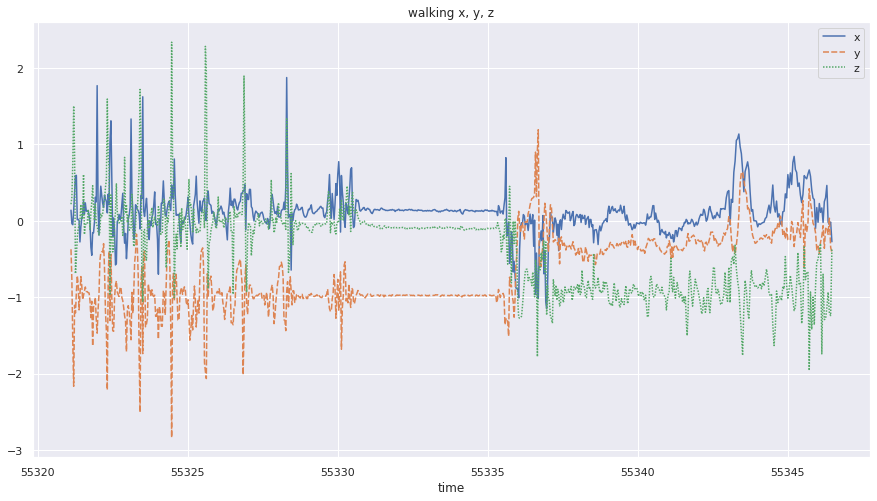

In [19]:
plot = sns.lineplot(data=walking_sample_df)
plot.set_title("walking x, y, z")


Apply a low-pass filter to the x-y-z streams data. Choose the filtering frequency yourself based on your understanding of human physics.

In your write-up, show the low-pass filtered signal, state what types of filters you used, and why you chose filtering frequency

In [50]:
x_filter_data = walking_sample_df['x'].to_numpy()
y_filter_data = walking_sample_df['y'].to_numpy()
z_filter_data = walking_sample_df['z'].to_numpy()

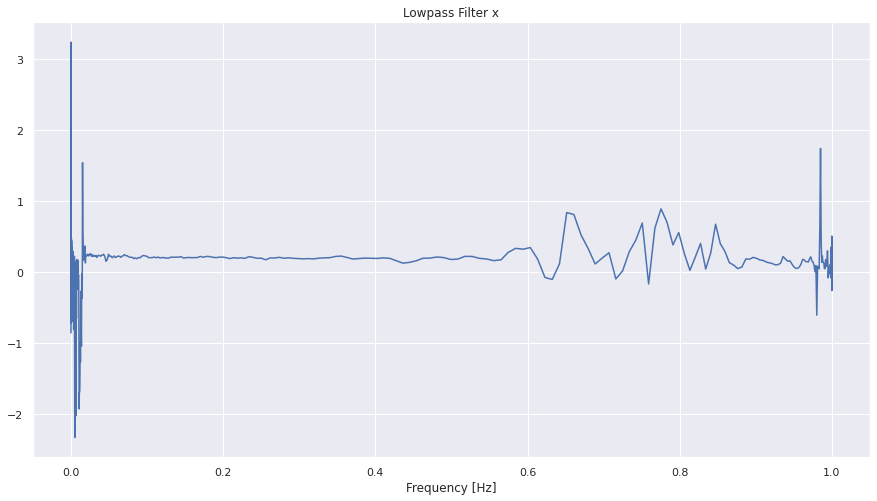

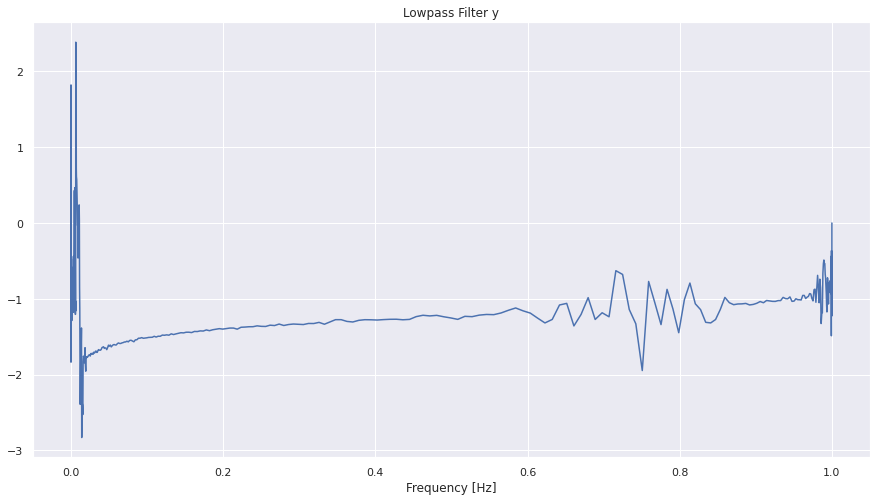

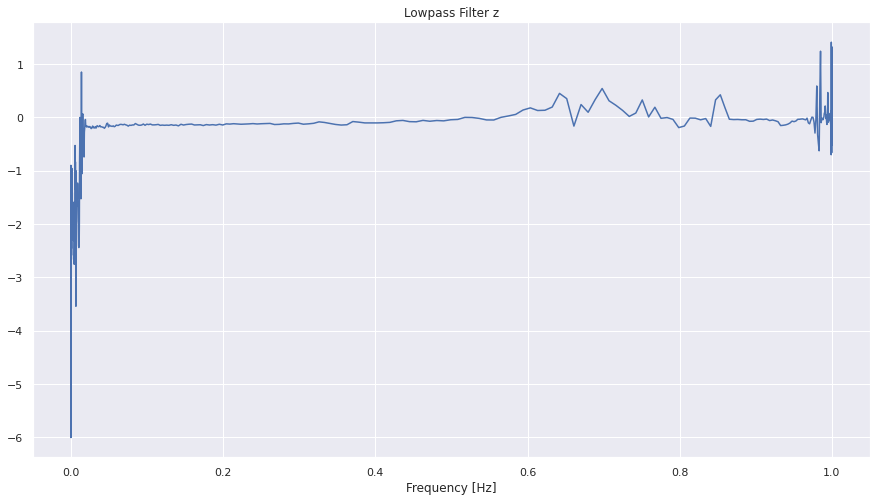

In [48]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# filter values
# sampling rate 40Hz
order = 6
fs = 8
cutoff = 1.5

# filter x
b, a = butter_lowpass(cutoff, fs, order)

w, h = freqz(b, a, worN=len(x_filter_data))
plt.plot(np.abs(h), w * x_filter_data, 'b')
plt.title("Lowpass Filter x")
plt.xlabel('Frequency [Hz]')
plt.show()

# filter y
b, a = butter_lowpass(cutoff, fs, order)

w, h = freqz(b, a, worN=len(y_filter_data))
plt.plot(np.abs(h), w * y_filter_data, 'b')
plt.title("Lowpass Filter y")
plt.xlabel('Frequency [Hz]')
plt.show()

# filter z
b, a = butter_lowpass(cutoff, fs, order)

w, h = freqz(b, a, worN=len(z_filter_data))
plt.plot(np.abs(h), w * z_filter_data, 'b')
plt.title("Lowpass Filter z")
plt.xlabel('Frequency [Hz]')
plt.show()

Plot a figure with x-axis as frequency and y-axis as amplitude for each of the x-y-z signals. In your write-up, answer: what frequencies do these signals occupy?

TODO - make plots for all 3 signals

https://docs.scipy.org/doc/scipy/tutorial/fft.html

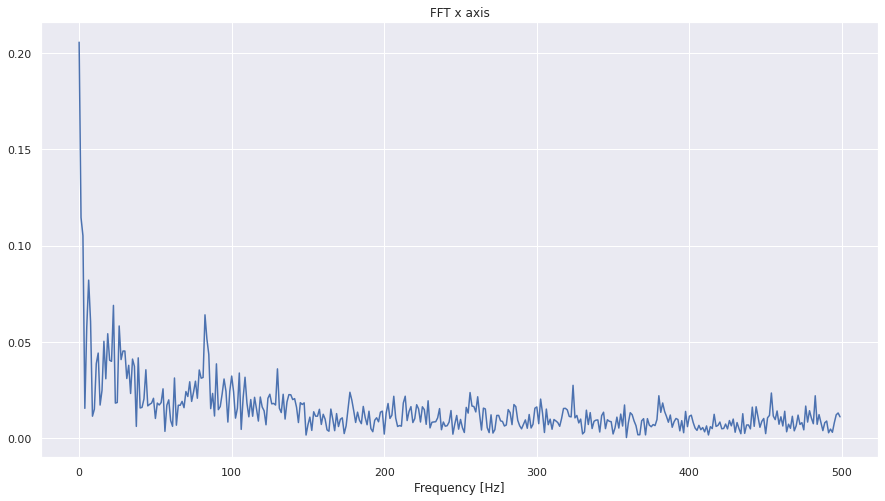

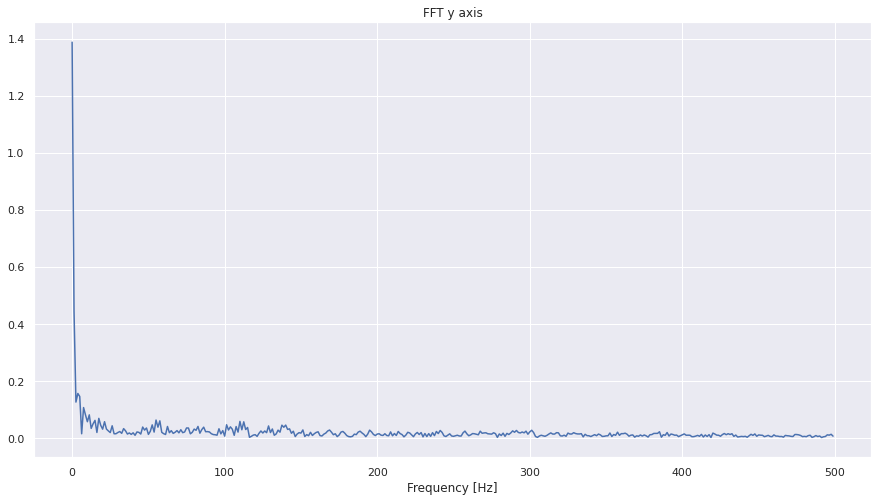

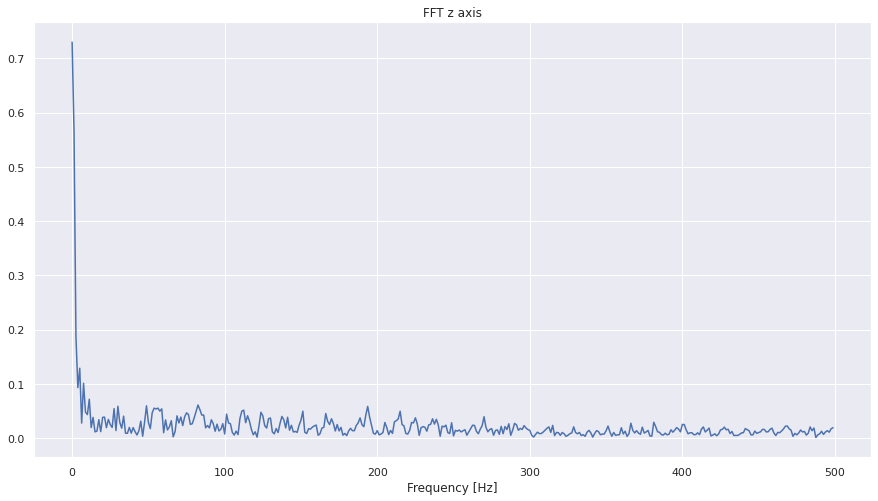

In [52]:
T = 1. / 1000

# x filter
data = fft(x_filter_data)
xf = fftfreq(len(data), T)[:len(data) // 2]

plt.plot(xf, 2.0 / len(data) * np.abs(data[0: len(data) // 2]))
plt.title("FFT x axis")
plt.xlabel('Frequency [Hz]')
plt.show()

# y filter
data = fft(y_filter_data)
xf = fftfreq(len(data), T)[:len(data) // 2]

plt.plot(xf, 2.0 / len(data) * np.abs(data[0: len(data) // 2]))
plt.title("FFT y axis")
plt.xlabel('Frequency [Hz]')
plt.show()

# z filter
data = fft(z_filter_data)
xf = fftfreq(len(data), T)[:len(data) // 2]

plt.plot(xf, 2.0 / len(data) * np.abs(data[0: len(data) // 2]))
plt.title("FFT z axis")
plt.xlabel('Frequency [Hz]')
plt.show()


In your write up, you should display your spectral density graph or spectrogram, and state how you used the spectrogram to determine your passing band choice.

/tmp/ipykernel_303888/941781997.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
/tmp/ipykernel_303888/941781997.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(c)


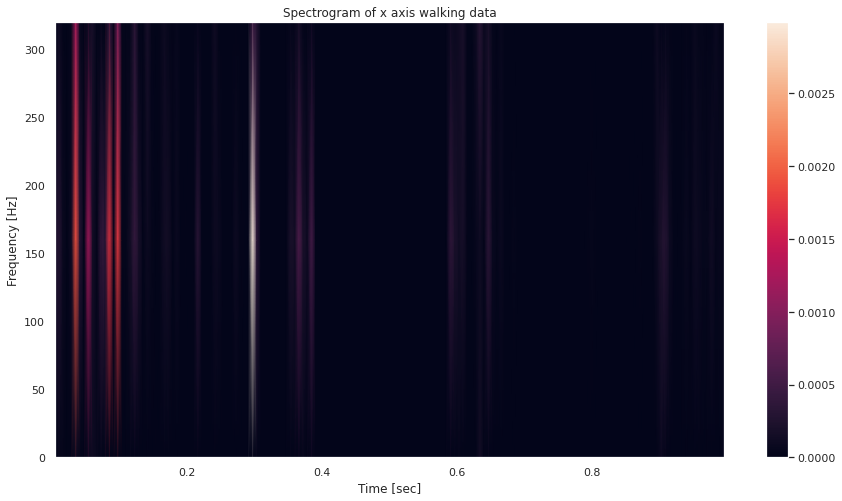

/tmp/ipykernel_303888/941781997.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
/tmp/ipykernel_303888/941781997.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(c)


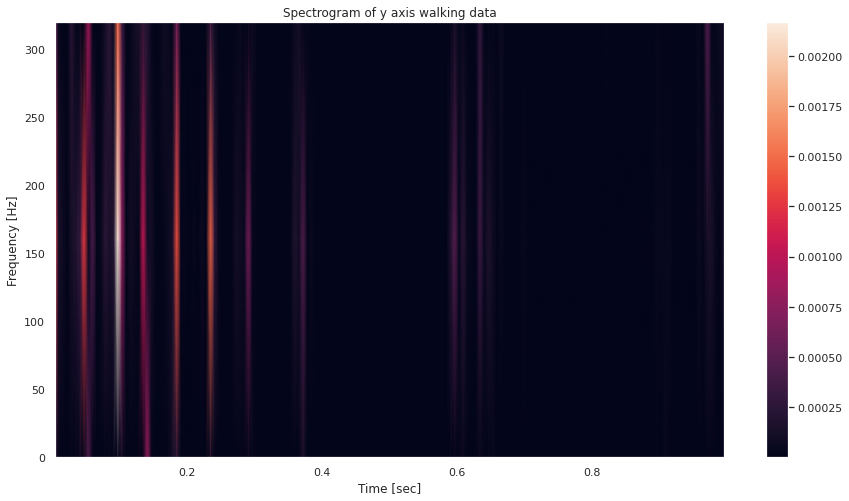

/tmp/ipykernel_303888/941781997.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
/tmp/ipykernel_303888/941781997.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(c)


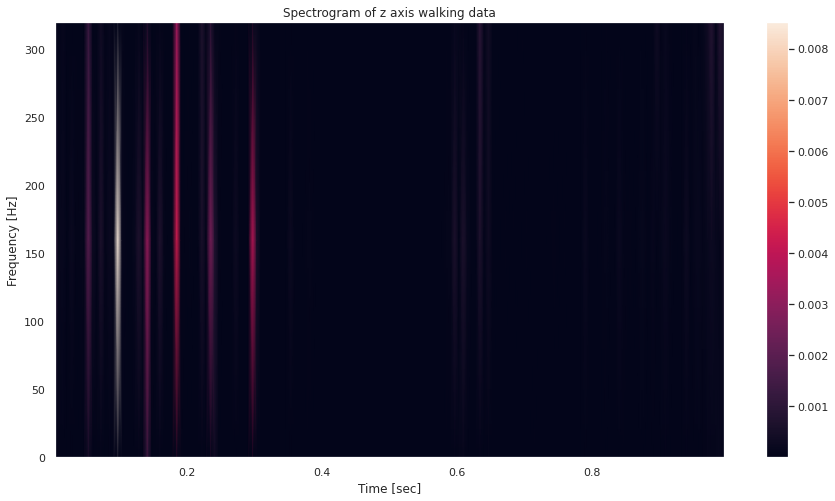

In [75]:
data = x_filter_data

f, t, Sxx = signal.spectrogram(x = data, fs=len(data), nperseg=5)
c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of x axis walking data")
plt.colorbar(c)
plt.show()

data = y_filter_data

f, t, Sxx = signal.spectrogram(x = data, fs=len(data), nperseg=5)
c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of y axis walking data")
plt.colorbar(c)
plt.show()

data = z_filter_data

f, t, Sxx = signal.spectrogram(x = data, fs=len(data), nperseg=5)
c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of z axis walking data")
plt.colorbar(c)
plt.show()

Plot the raw signal, the low-passed signal and band-passed signal

In your writeup, compare the filtered signals and answer which filtering method you’d use to clean your signal? Why?

In [64]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


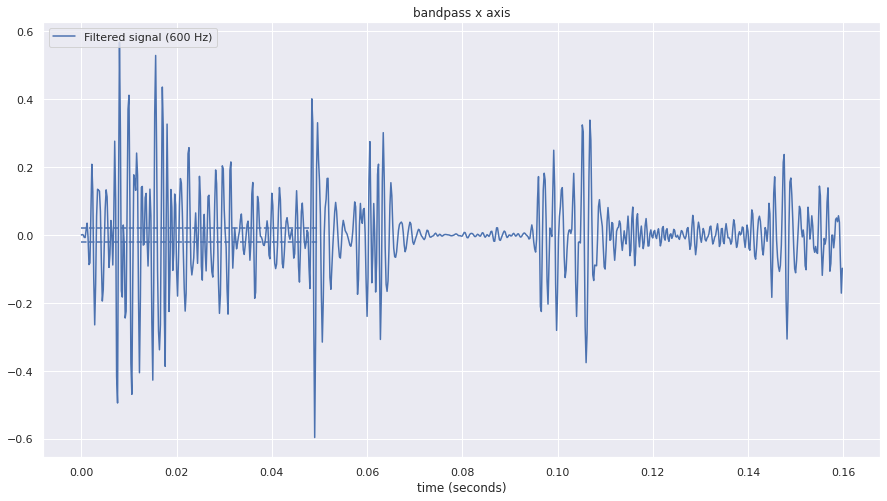

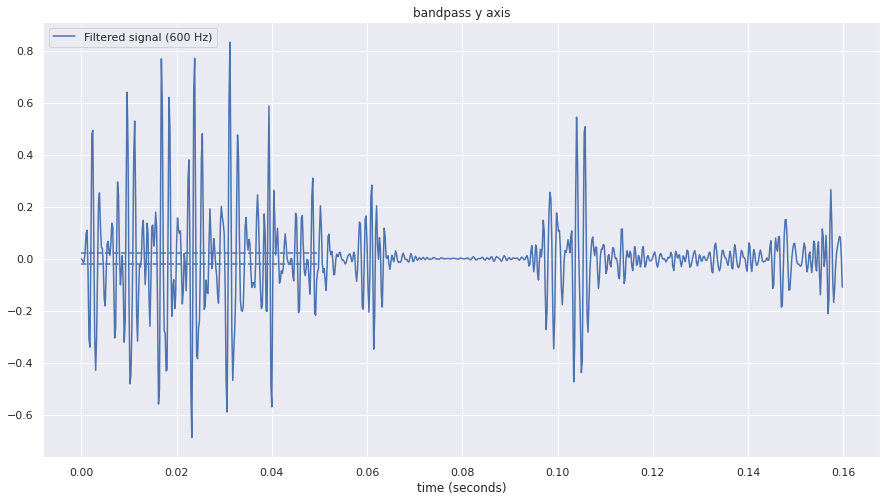

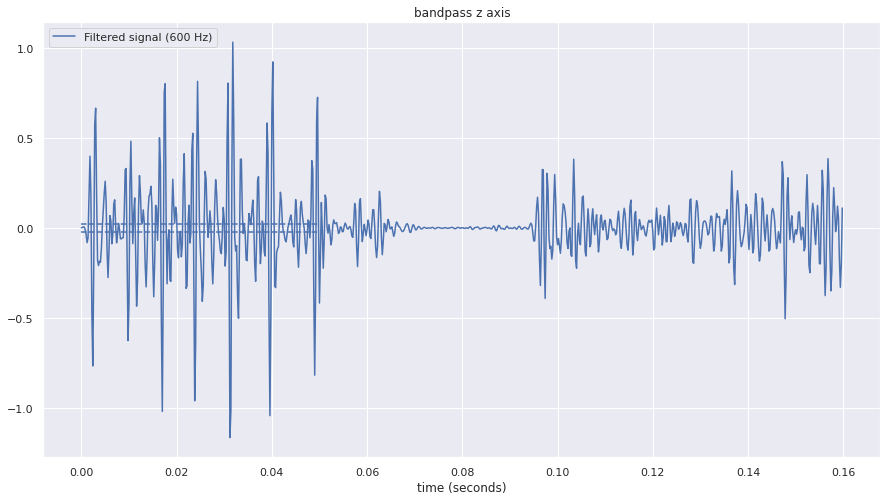

In [68]:
fs = 5000.0
lowcut = 500.0
highcut = 1250.0
T = 0.05
a = 0.02
f0 = 600.0
t = np.arange(0, len(x_filter_data)) / fs

# x data
data = x_filter_data
filtered = butter_bandpass_filter(data, lowcut, highcut, fs, order=6)

plt.plot(t, filtered, label='Filtered signal (%g Hz)' % f0)
plt.title('bandpass x axis')
plt.xlabel('time (seconds)')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.show()

# y data
data = y_filter_data
filtered = butter_bandpass_filter(data, lowcut, highcut, fs, order=6)

plt.plot(t, filtered, label='Filtered signal (%g Hz)' % f0)
plt.title('bandpass y axis')
plt.xlabel('time (seconds)')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.show()

# z data
data = z_filter_data
filtered = butter_bandpass_filter(data, lowcut, highcut, fs, order=6)

plt.plot(t, filtered, label='Filtered signal (%g Hz)' % f0)
plt.title('bandpass z axis')
plt.xlabel('time (seconds)')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.show()

## 3

Feature engineering

Plot the filtered signal, and a spectral density graph or spectrogram, of each activity.

### running

In [78]:
df = person_1_labels

timestamps = df[df['running'] == 1]['timestamp']

files = []

for timestamp in timestamps:
    file_name = f'{timestamp}.m_raw_acc.dat'
    if file_name in file_names:
        files.append(file_name)

print(len(files))

curr_file = files[0]

running_sample_df = pd.read_csv(f'{file_dir}/{curr_file}', on_bad_lines='warn',
                 header=None, sep = "\s+|\t+|\s+\t+|\t+\s+",
                 names=['time', 'x', 'y', 'z']).set_index('time')
running_sample_df

33


/tmp/ipykernel_303888/413497918.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  running_sample_df = pd.read_csv(f'{file_dir}/{curr_file}', on_bad_lines='warn',


,x,y,z
time,,,
82689.575395,0.313417,-0.769988,-1.168471
82689.605198,0.082532,-0.786807,-0.802844
82689.634990,-0.084810,-0.434343,-0.690599
82689.664793,0.097296,-0.229196,-0.785105
82689.694593,0.759526,-0.163890,-1.010753
...,...,...,...
82714.999734,1.787334,1.068538,0.560115
82715.041794,4.786795,-0.329934,-0.677026
82715.084396,3.215194,-0.622498,-2.394776


In [79]:
x_filter_data = running_sample_df['x'].to_numpy()
y_filter_data = running_sample_df['y'].to_numpy()
z_filter_data = running_sample_df['z'].to_numpy()

/tmp/ipykernel_303888/853792753.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
/tmp/ipykernel_303888/853792753.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(c)


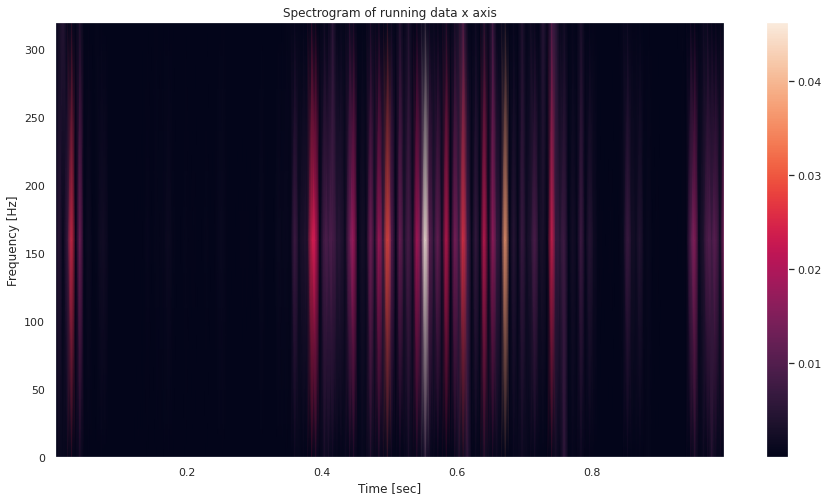

/tmp/ipykernel_303888/853792753.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
/tmp/ipykernel_303888/853792753.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(c)


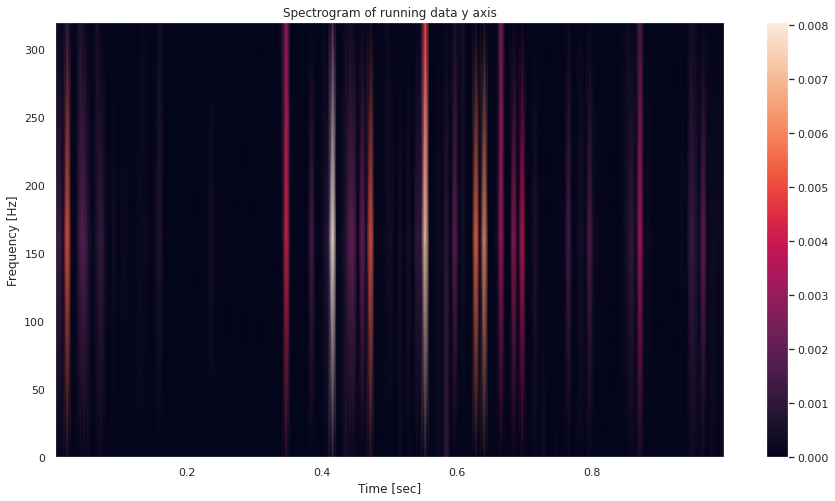

/tmp/ipykernel_303888/853792753.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
/tmp/ipykernel_303888/853792753.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(c)


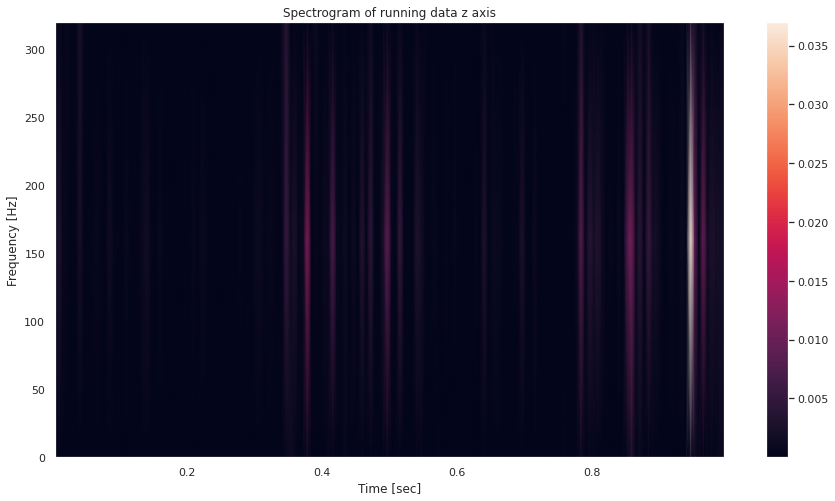

In [80]:
data = x_filter_data

f, t, Sxx = signal.spectrogram(x = data, fs=len(data), nperseg=5)
c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of running data x axis")
plt.colorbar(c)
plt.show()

data = y_filter_data

f, t, Sxx = signal.spectrogram(x = data, fs=len(data), nperseg=5)
c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of running data y axis")
plt.colorbar(c)
plt.show()

data = z_filter_data

f, t, Sxx = signal.spectrogram(x = data, fs=len(data), nperseg=5)
c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of running data z axis")
plt.colorbar(c)
plt.show()

In [82]:
df = person_1_labels

timestamps = df[df['standing_in_place'] == 1]['timestamp']

files = []

for timestamp in timestamps:
    file_name = f'{timestamp}.m_raw_acc.dat'
    if file_name in file_names:
        files.append(file_name)

print(len(files))

curr_file = files[0]

standing_sample_df = pd.read_csv(f'{file_dir}/{curr_file}', on_bad_lines='warn',
                 header=None, sep = "\s+|\t+|\s+\t+|\t+\s+",
                 names=['time', 'x', 'y', 'z']).set_index('time')
standing_sample_df

80


/tmp/ipykernel_303888/2993049130.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  standing_sample_df = pd.read_csv(f'{file_dir}/{curr_file}', on_bad_lines='warn',


,x,y,z
time,,,
68581.364935,-0.088877,-0.559779,-0.841502
68581.394764,-0.077120,-0.535509,-0.880174
68581.424593,-0.042501,-0.537420,-0.823339
68581.454424,-0.034518,-0.519839,-0.852251
68581.484255,-0.040144,-0.503783,-0.912642
...,...,...,...
68606.494196,0.478492,-0.324364,-0.863427
68606.536310,0.440217,-0.329924,-0.851973
68606.578401,0.434391,-0.314983,-0.838634


In [83]:
x_filter_data = standing_sample_df['x'].to_numpy()
y_filter_data = standing_sample_df['y'].to_numpy()
z_filter_data = standing_sample_df['z'].to_numpy()

/tmp/ipykernel_303888/1913772899.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
/tmp/ipykernel_303888/1913772899.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(c)


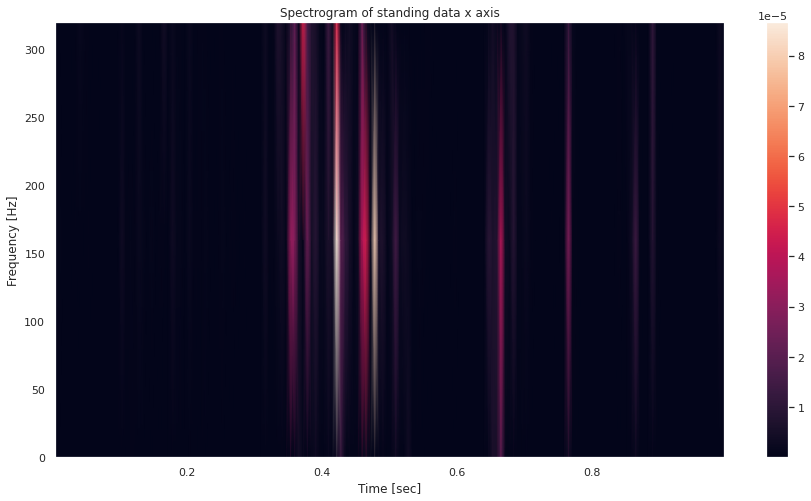

/tmp/ipykernel_303888/1913772899.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
/tmp/ipykernel_303888/1913772899.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(c)


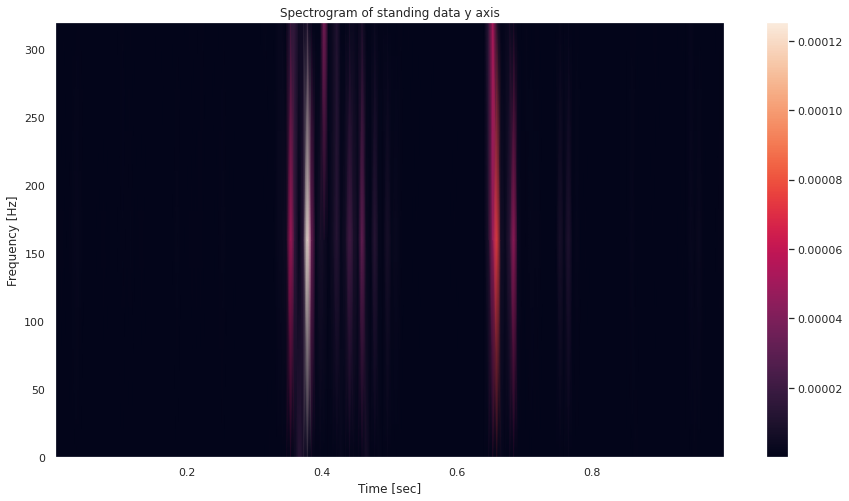

/tmp/ipykernel_303888/1913772899.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
/tmp/ipykernel_303888/1913772899.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(c)


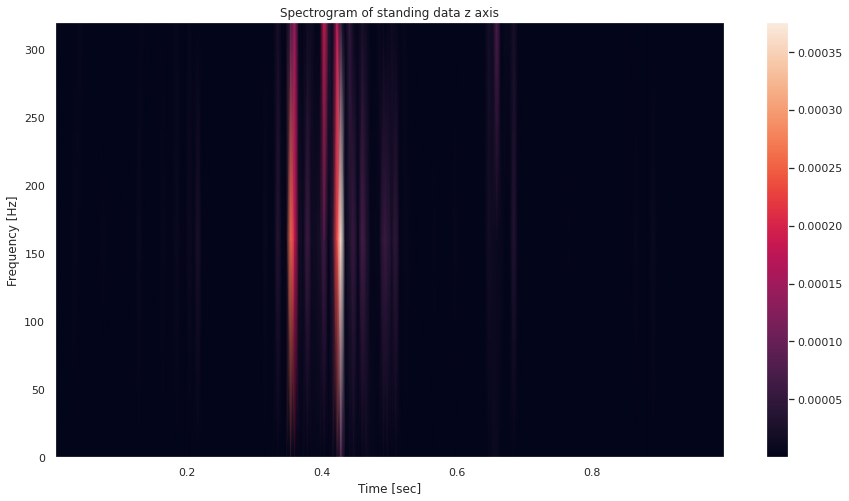

In [85]:
data = x_filter_data

f, t, Sxx = signal.spectrogram(x = data, fs=len(data), nperseg=5)
c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of standing data x axis")
plt.colorbar(c)
plt.show()

data = y_filter_data

f, t, Sxx = signal.spectrogram(x = data, fs=len(data), nperseg=5)
c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of standing data y axis")
plt.colorbar(c)
plt.show()

data = z_filter_data

f, t, Sxx = signal.spectrogram(x = data, fs=len(data), nperseg=5)
c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of standing data z axis")
plt.colorbar(c)
plt.show()

In [87]:
df = person_1_labels

timestamps = df[df['bicycling'] == 1]['timestamp']

files = []

for timestamp in timestamps:
    file_name = f'{timestamp}.m_raw_acc.dat'
    if file_name in file_names:
        files.append(file_name)

print(len(files))

curr_file = files[0]

bicycling_sample_df = pd.read_csv(f'{file_dir}/{curr_file}', on_bad_lines='warn',
                 header=None, sep = "\s+|\t+|\s+\t+|\t+\s+",
                 names=['time', 'x', 'y', 'z']).set_index('time')
bicycling_sample_df

120


/tmp/ipykernel_303888/1182023028.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  bicycling_sample_df = pd.read_csv(f'{file_dir}/{curr_file}', on_bad_lines='warn',


,x,y,z
time,,,
82196.705054,-0.217557,0.557604,0.289584
82196.734832,-0.119672,0.870760,0.259615
82196.764609,-0.152835,0.947645,-0.543597
82196.794390,0.586812,-1.411250,0.295675
82196.824164,0.035912,-0.098808,-0.159462
...,...,...,...
82222.265643,-0.167887,0.937124,-0.672724
82222.307769,-0.679983,1.072825,-1.087911
82222.349845,-0.788137,1.378275,-0.878546


In [88]:
x_filter_data = bicycling_sample_df['x'].to_numpy()
y_filter_data = bicycling_sample_df['y'].to_numpy()
z_filter_data = bicycling_sample_df['z'].to_numpy()

/tmp/ipykernel_303888/819048260.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
/tmp/ipykernel_303888/819048260.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(c)


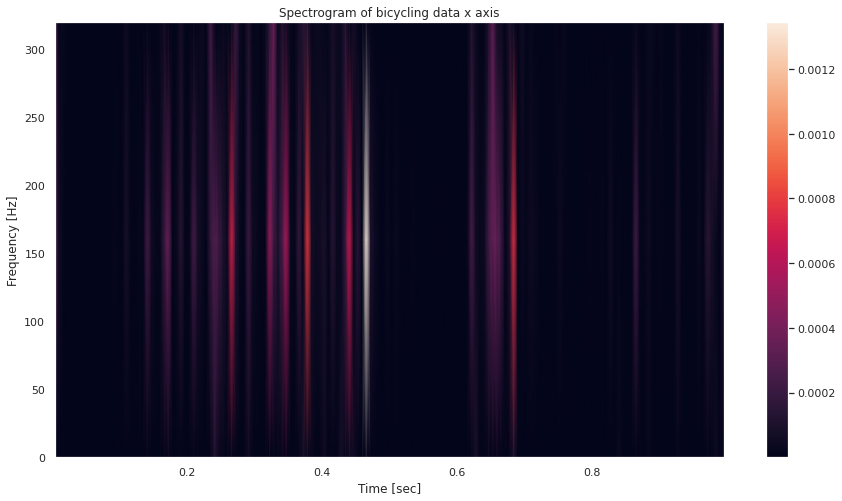

/tmp/ipykernel_303888/819048260.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
/tmp/ipykernel_303888/819048260.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(c)


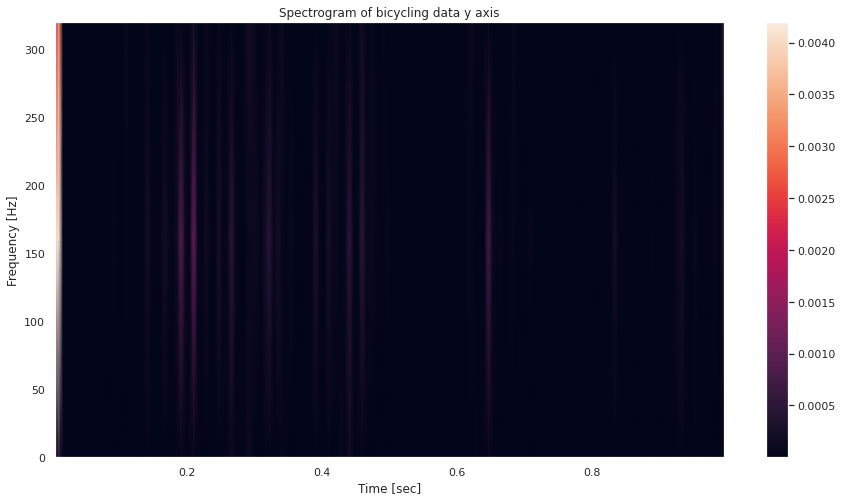

/tmp/ipykernel_303888/819048260.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
/tmp/ipykernel_303888/819048260.py:28: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(c)


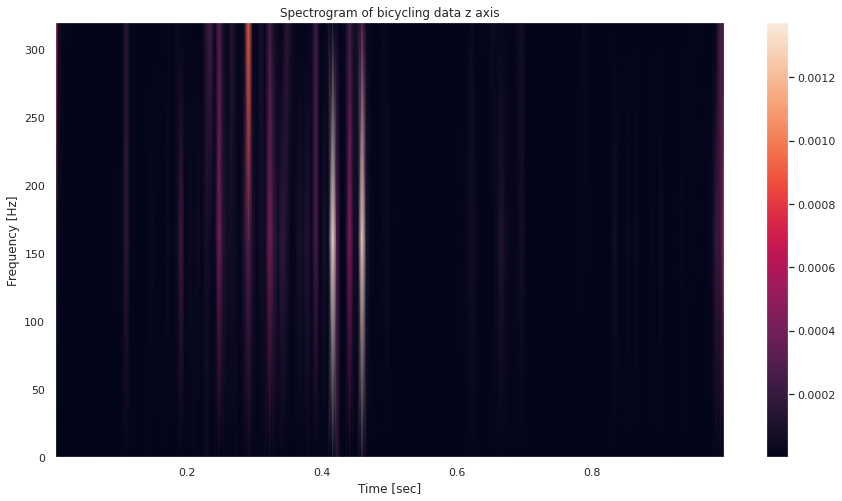

In [89]:
data = x_filter_data

f, t, Sxx = signal.spectrogram(x = data, fs=len(data), nperseg=5)
c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of bicycling data x axis")
plt.colorbar(c)
plt.show()

data = y_filter_data

f, t, Sxx = signal.spectrogram(x = data, fs=len(data), nperseg=5)
c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of bicycling data y axis")
plt.colorbar(c)
plt.show()

data = z_filter_data

f, t, Sxx = signal.spectrogram(x = data, fs=len(data), nperseg=5)
c = plt.pcolormesh(t, f, np.abs(Sxx), shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Spectrogram of bicycling data z axis")
plt.colorbar(c)
plt.show()